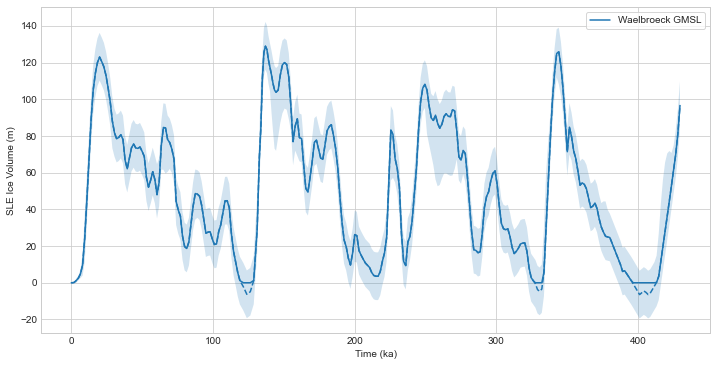

In [12]:
fig, ax = plt.subplots(figsize=[12,6])

ax.plot(waelbroeck_times, -waelbroeck_gmsl, '--', color="C0")
ax.plot(waelbroeck_times, -waelbroeck_gmsl_no_melt, color="C0", label="Waelbroeck GMSL")
ax.fill_between(waelbroeck_times, -waelbroeck_gmsl_min, -waelbroeck_gmsl_max, alpha=0.2)
ax.set_xlabel("Time (ka)")
ax.set_ylabel("SLE Ice Volume (m)")
#ax.set_xlim([110,220])
#ax.set_ylim([0,220])
ax.legend(frameon=True)
#fig.savefig("afig1.png", dpi=300, bbox_inches="tight")

In [119]:
xr.open_dataset("/nfs/b0029/Data/Oliver/output/lhs/sealevel/1.nc").rsl.sel(time=115000).to_netcdf("download.nc")

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import interpolate
import regionmask
from tqdm.auto import tqdm
from pathlib import Path

import icesea.functions as functions
from icesea.models import GlobalIceGrid
from icesea.plot import LinePlot, MapPlot
from icesea.scale_ice import scale, scale_params, scale_from_params, change_of_sign
import icesea.config as config

In [3]:
Eurasia = [[-20,30],[-20,60],[-10,60],[-10,65],[0,80],[0,90],[170,90],[170,30]]
NorthAmerica = [[-47,30],[-47,50],[-60,70],[-70,75],[-70,90],[-170,90],[-170,30]]
Greenland = [[-47,50],[-60,70], [-70,75], [-70,90], [0,90], [0,80], [-10,65], [-10,60], [-20,60]]
Antarctica = [[-180,-90],[-180,-60],[180,-60],[180,-90]]
Other = [[-180,-60],[-180,90],[-170,90],[-170,30],[-47,30],[-47,50],[-20,60],[-20,30],[170,30],[170,90],[180,90],[180,-60],[-180,-60]]

names = ["Eurasia", "North America", "Greenland", "Antarctica", "Other"]
abbrevs = ["Er", "NA", "Gr", "An", "O"]
mask_generator = regionmask.Regions([Eurasia, NorthAmerica,Greenland, Antarctica,Other],names=names, abbrevs=abbrevs, name="Ice Sheet Regions")

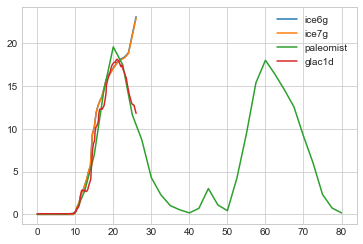

In [171]:
names = ["ice6g", "ice7g", "paleomist", "glac1d"]
for name in names:
    ice = xr.open_dataset(f"/nfs/b0029/Data/Oliver/data/ice/{name}.nc")
    ice6g_volumes = functions.volume_to_sle(ice.thickness * area)
    ice6g_er_vol = np.sum(ice6g_volumes * xr.ones_like(mask).where(mask==0, 0).values, axis=(1,2))
    plt.plot(ice.time, ice6g_er_vol, label=name)
plt.legend()

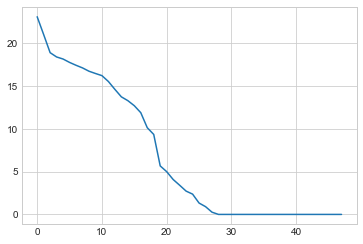

In [64]:
ice = xr.open_dataset("/nfs/b0029/Data/Oliver/data/ice/ice6g.nc")
area = functions.calc_grid_area_geo(config.gl512.lons-180, np.flip(config.gl512.lats))
volumes = functions.volume_to_sle(ice.thickness * area)

mask = mask_generator.mask(volumes[0])

global_vol = np.sum(volumes, axis=(1,2))

er_vol = np.sum(volumes * xr.ones_like(mask).where(mask==0, 0).values, axis=(1,2))
na_vol = np.sum(volumes * xr.ones_like(mask).where(mask==1, 0).values, axis=(1,2))
gr_vol = np.sum(volumes * xr.ones_like(mask).where(mask==2, 0).values, axis=(1,2))
an_vol = np.sum(volumes * xr.ones_like(mask).where(mask==3, 0).values, axis=(1,2))
ot_vol = np.sum(volumes * xr.ones_like(mask).where(mask==4, 0).values, axis=(1,2))

er_pgm_volume = er_vol.sel(time=slice(150, 220))
na_pgm_volume = na_vol.sel(time=slice(150, 220))

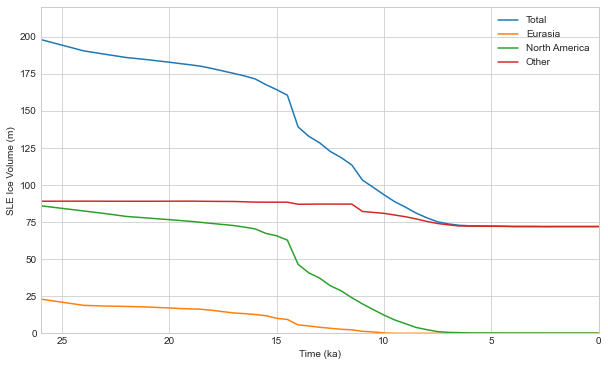

In [75]:
fig, ax = plt.subplots(figsize=[10,6])

ax.plot(ice.time, global_vol, label="Total")
ax.plot(ice.time, er_vol, label="Eurasia")
ax.plot(ice.time, na_vol, label="North America")
ax.plot(ice.time, gr_vol+ an_vol + ot_vol, label="Other")
#ax.plot(global_base.time, base_global_vol - base_er_vol - base_na_vol)
ax.set_xlabel("Time (ka)")
ax.set_ylabel("SLE Ice Volume (m)")
ax.set_ylim([0,220])
ax.set_xlim([26, 0])
ax.legend()

(220.0, 110.0)

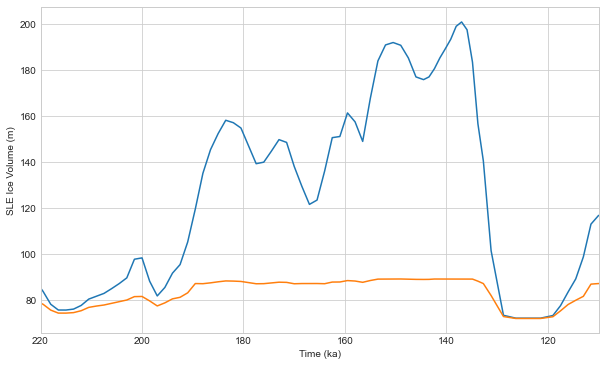

In [70]:
fig, ax = plt.subplots(figsize=[10,6])

ax.plot(global_base.time, base_global_vol)
ax.plot(global_base.time, base_global_vol - base_er_vol - base_na_vol)
ax.set_xlabel("Time (ka)")
ax.set_ylabel("SLE Ice Volume (m)")
ax.set_xlim([220, 110])

In [ ]:
def plot_curve(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=[12,6])
        
    return fig, ax
    

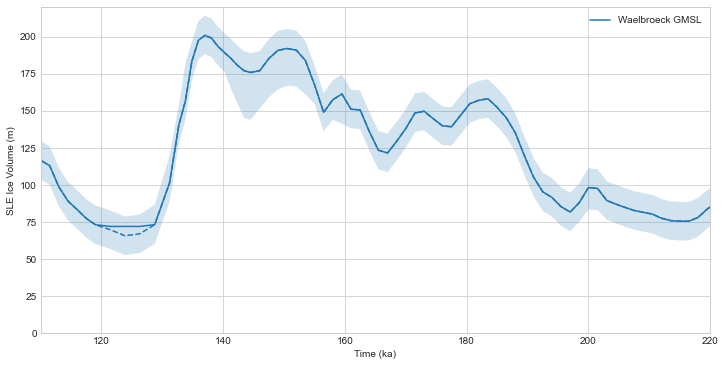

In [99]:
fig, ax = plt.subplots(figsize=[12,6])

ax.plot(waelbroeck_times, -waelbroeck_gmsl+base_global_vol.values[0], '--', color="C0")
ax.plot(waelbroeck_times, -waelbroeck_gmsl_no_melt+base_global_vol.values[0], color="C0", label="Waelbroeck GMSL")
ax.fill_between(waelbroeck_times, -waelbroeck_gmsl_min+base_global_vol.values[0], -waelbroeck_gmsl_max+base_global_vol.values[0], alpha=0.2)
ax.set_xlabel("Time (ka)")
ax.set_ylabel("SLE Ice Volume (m)")
ax.set_xlim([110,220])
ax.set_ylim([0,220])
ax.legend()
fig.savefig("afig1.png", dpi=300, bbox_inches="tight")

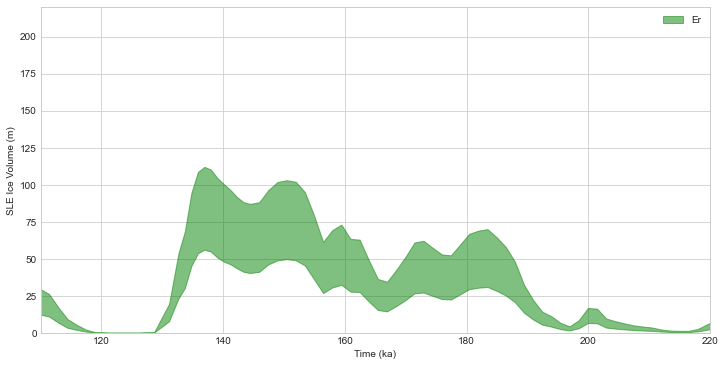

In [104]:
fig, ax = plt.subplots(figsize=[12,6])

#ax.plot(global_base.time, base_global_vol)
#ax.plot(global_base.time, base_global_vol -(base_er_vol + base_na_vol))
#ax.plot(global_base.time, base_er_vol + base_na_vol, label="Er + NA")
#ax.plot(global_base.time, base_er_vol, label='Er')
#ax.plot(global_base.time, base_na_vol, label='NA')
#ax.fill_between(waelbroeck_times, -waelbroeck_gmsl_min, -waelbroeck_gmsl_max, alpha=0.2)
ax.fill_between(global_base.time, base_er_vol_scaled, base_er_vol + base_na_vol, color="green", alpha=0.5, label="Er")
ax.set_xlabel("Time (ka)")
ax.set_ylabel("SLE Ice Volume (m)")
ax.set_xlim([110,220])
ax.set_ylim([0,220])
ax.legend()
fig.savefig("afig3.png", dpi=300, bbox_inches="tight")

In [6]:
# load waelbroeck gmsl curve data
waelbroeck_csv = "../data/to_sort/waelbroeck_d18o_gmsl.txt"
waelbroeck_data = np.genfromtxt(waelbroeck_csv, skip_header=107, skip_footer=(701-406), encoding='ISO-8859-1')
waelbroeck_times = np.insert(waelbroeck_data[:,0], 0, 0)
waelbroeck_gmsl = np.insert(waelbroeck_data[:,4], 0, 0)
waelbroeck_gmsl_min = np.insert(waelbroeck_data[:,5], 0, waelbroeck_data[:,5][0])
waelbroeck_gmsl_max = np.insert(waelbroeck_data[:,6], 0, waelbroeck_data[:,5][0])

waelbroeck_gmsl_no_melt = waelbroeck_gmsl.copy()
waelbroeck_gmsl_no_melt[waelbroeck_gmsl > waelbroeck_gmsl[0]] = waelbroeck_gmsl[0]
f = interpolate.interp1d(waelbroeck_times, waelbroeck_gmsl_no_melt, fill_value='extrapolate')

#waelbroeck_times = col_ice.time.values[:-22]
#waelbroeck_gmsl = f(col_ice.time.values[:-22])

In [8]:
ice6g = xr.open_dataset("/nfs/b0029/Data/Oliver/data/ice/ice6g.nc")
ice6g_thickness = np.insert(ice6g.thickness.values, 0, np.zeros_like(ice6g.thickness[0]), axis=0)
ice6g_sle = np.sum(functions.volume_to_sle(ice6g_thickness * area), axis=(1,2))

FileNotFoundError: [Errno 2] No such file or directory: b'/nfs/b0029/Data/Oliver/data/ice/ice6g.nc'

In [6]:
global_base = scale(-waelbroeck_gmsl_no_melt + ice6g_sle[-1], ice6g_sle, ice6g_thickness)
global_base = xr.DataArray(global_base, coords = {"time": waelbroeck_times, "lat": np.flip(config.gl512.lats), "lon": config.gl512.lons-180}, dims=["time", "lat", "lon"])

In [7]:
base_volumes = functions.volume_to_sle(global_base * area)

base_global_vol = np.sum(base_volumes, axis=(1,2))

base_er_vol = np.sum(base_volumes * xr.ones_like(mask).where(mask==0, 0).values, axis=(1,2))
base_na_vol = np.sum(base_volumes * xr.ones_like(mask).where(mask==1, 0).values, axis=(1,2))
base_gr_vol = np.sum(base_volumes * xr.ones_like(mask).where(mask==2, 0).values, axis=(1,2))
base_an_vol = np.sum(base_volumes * xr.ones_like(mask).where(mask==3, 0).values, axis=(1,2))
base_ot_vol = np.sum(base_volumes * xr.ones_like(mask).where(mask==4, 0).values, axis=(1,2))

In [92]:
na_scale_factor = 0.64

base_er_na_vol = base_er_vol + base_na_vol
base_na_vol_scaled = base_na_vol*na_scale_factor
base_er_vol_scaled = base_er_na_vol - base_na_vol_scaled

In [165]:
np.max(base_er_na_vol.sel(time=slice(120,200)))/2

<xarray.DataArray ()>
array(55.97845993)

(0.0, 30.0)

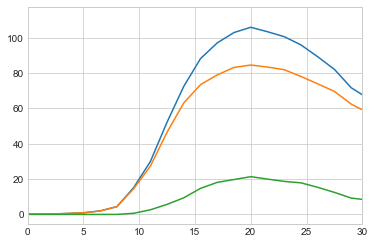

In [166]:
plt.plot(waelbroeck_times, base_er_vol + base_na_vol, label="Total Er + NA")
plt.plot(waelbroeck_times, base_na_vol, label="NA")
plt.plot(waelbroeck_times, base_er_vol, label="Er")
plt.xlim([0,30])

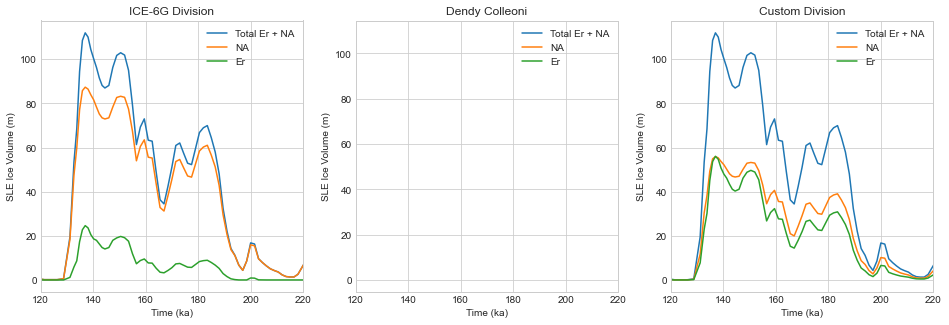

In [93]:
fig, ax = plt.subplots(1,3, figsize=[16,5])
t_range = [120,220]

ax[0].plot(waelbroeck_times, base_er_vol + base_na_vol, label="Total Er + NA")
ax[0].plot(waelbroeck_times, base_na_vol, label="NA")
ax[0].plot(waelbroeck_times, base_er_vol, label="Er")
ax[0].set_title("ICE-6G Division")

ax[1].plot(ice.time, er_vol + na_vol, label="Total Er + NA")
ax[1].plot(ice.time, na_vol, label="NA")
ax[1].plot(ice.time, er_vol, label="Er")
ax[1].set_title("Dendy Colleoni")

na_scale_factor = 0.50
ax[2].plot(waelbroeck_times, base_er_na_vol, label="Total Er + NA")
ax[2].plot(waelbroeck_times, base_na_vol_scaled, label="NA")
ax[2].plot(waelbroeck_times, base_er_vol_scaled, label="Er")
ax[2].set_title("Custom Division")

for ix in np.ndindex(ax.shape):
    axes = ax[ix]
    axes.legend()
    axes.set_xlim(t_range)
    axes.set_xlabel("Time (ka)")
    axes.set_ylabel("SLE Ice Volume (m)")
    
fig.savefig("fig1.png", dpi=300, bbox_inches="tight")

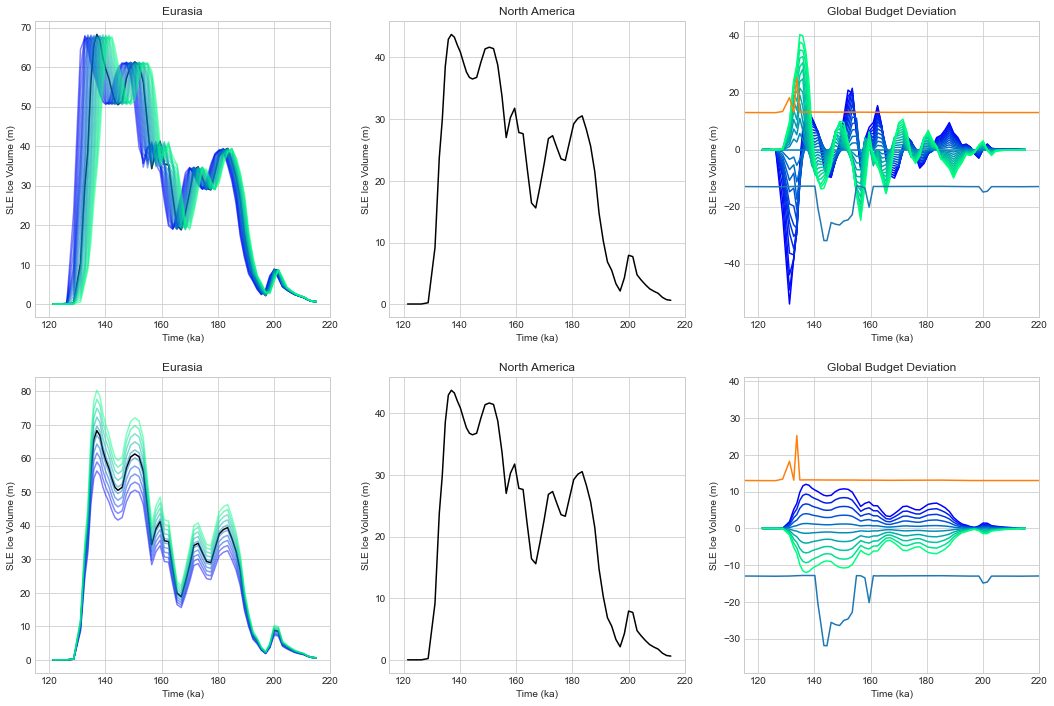

In [18]:
na_const = True

import matplotlib

cmap = matplotlib.cm.get_cmap('winter')
fig, ax = plt.subplots(2, 3, figsize=[18,12])

er_pgm_volume = base_er_vol_scaled.sel(time=slice(120,215))
na_pgm_volume = base_na_vol_scaled.sel(time=slice(120,215))

times = er_pgm_volume.time.values
curve = er_pgm_volume.values

ax[0,0].plot(times, curve, c="black")
ax[0,1].plot(na_pgm_volume.time.values, na_pgm_volume.values, c="black")
ax[1,0].plot(times, curve, c="black")
ax[1,1].plot(na_pgm_volume.time.values, na_pgm_volume.values, c="black")

pgm_index = np.argmax(er_pgm_volume.values)

gl_times = times[:pgm_index+1]
gl_curve = curve[:pgm_index+1]
de_times = times[pgm_index:]
de_curve = curve[pgm_index:]

vol_param = np.linspace(-12,12,num=10)
time_param = np.linspace(-5,5,num=25)


for index, time in enumerate(time_param):
    pgm_max_vol = gl_curve[-1] + 0
    pgm_max_time = gl_times[-1] + time

    gl_times_stretch, gl_curve_stretch = stretch(gl_times, gl_curve, pgm_max_time, pgm_max_vol)
    de_times_stretch, de_curve_stretch = stretch(de_times, de_curve, pgm_max_time, pgm_max_vol, flip=True)

    times_stretch = np.concatenate([gl_times_stretch, de_times_stretch[1:]])
    curve_stretch = np.concatenate([gl_curve_stretch, de_curve_stretch[1:]])

    f = interpolate.interp1d(times_stretch, curve_stretch, kind='linear')
    curve_stretch = f(times)

    #plt.plot(gl_times_stretch, gl_curve_stretch)
    #plt.plot(de_times_stretch, de_curve_stretch)
    color = cmap(index/(len(time_param)-1))
    ax[0,0].plot(times, curve_stretch, c=color, alpha = 0.5)
    if na_const is True:
        scaled_na_vol = na_pgm_volume.values# + (curve - curve_stretch)
    else:
        residual = (curve_stretch - curve)
        scaled_na_vol = na_pgm_volume.values - residual
        ax[0,1].plot(na_pgm_volume.time.values, scaled_na_vol, c=color, alpha = 0.5)
    
    global_budget = base_global_vol.sel(time=slice(120,215)) - scaled_na_vol - curve_stretch - base_ot_vol.sel(time=slice(120,215)) - base_gr_vol.sel(time=slice(120,215)) - base_an_vol.sel(time=slice(120,215))
    ax[0,2].plot(global_budget.time.values, global_budget, c=color)

for index, vol in enumerate(vol_param):
    pgm_max_vol = gl_curve[-1] + vol
    pgm_max_time = gl_times[-1] + 0

    gl_times_stretch, gl_curve_stretch = stretch(gl_times, gl_curve, pgm_max_time, pgm_max_vol)
    de_times_stretch, de_curve_stretch = stretch(de_times, de_curve, pgm_max_time, pgm_max_vol, flip=True)

    times_stretch = np.concatenate([gl_times_stretch, de_times_stretch[1:]])
    curve_stretch = np.concatenate([gl_curve_stretch, de_curve_stretch[1:]])

    f = interpolate.interp1d(times_stretch, curve_stretch, kind='linear')
    curve_stretch = f(times)

    #plt.plot(gl_times_stretch, gl_curve_stretch)
    #plt.plot(de_times_stretch, de_curve_stretch)
    color = cmap(index/(len(vol_param)-1))
    ax[1,0].plot(times, curve_stretch, c=color, alpha = 0.5)
    if na_const is True:
        scaled_na_vol = na_pgm_volume.values# + (curve - curve_stretch)
    else:
        residual = (curve_stretch - curve)
        scaled_na_vol = na_pgm_volume.values - residual
        ax[1,1].plot(na_pgm_volume.time.values, scaled_na_vol, c=color, alpha = 0.5)
    
    global_budget = base_global_vol.sel(time=slice(120,215)) - scaled_na_vol - curve_stretch - base_ot_vol.sel(time=slice(120,215)) - base_gr_vol.sel(time=slice(120,215)) - base_an_vol.sel(time=slice(120,215))
    ax[1,2].plot(global_budget.time.values, global_budget, c=color)
    
    
    #plt.plot(x_new, y_new)
ax[0,2].plot(waelbroeck_times, waelbroeck_gmsl - waelbroeck_gmsl_min)
ax[0,2].plot(waelbroeck_times, waelbroeck_gmsl - waelbroeck_gmsl_max)
ax[0,2].set_xlim([np.min(global_budget.time.values), np.max(global_budget.time.values)])
ax[1,2].plot(waelbroeck_times, waelbroeck_gmsl - waelbroeck_gmsl_min)
ax[1,2].plot(waelbroeck_times, waelbroeck_gmsl - waelbroeck_gmsl_max)
ax[1,2].set_xlim([np.min(global_budget.time.values), np.max(global_budget.time.values)])

for ix,iy in np.ndindex(ax.shape):
    axes = ax[ix,iy]
    axes.set_xlim([115, 220])
    axes.set_xlabel("Time (ka)")
    axes.set_ylabel("SLE Ice Volume (m)")
    
    if iy == 0:
        axes.set_title("Eurasia")
    if iy == 1:
        axes.set_title("North America")
    if iy == 2:
        axes.set_title("Global Budget Deviation")

fig.savefig("fig3.png", dpi=300, bbox_inches="tight")

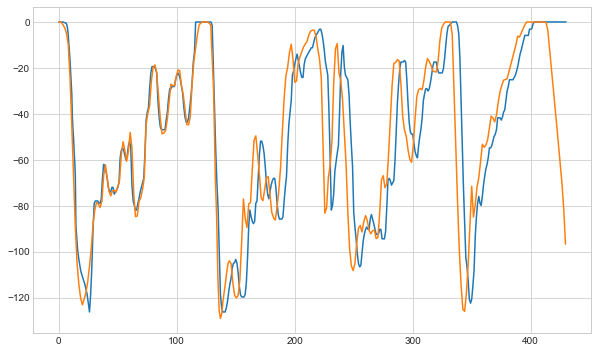

In [68]:
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(global_vol.time, -global_vol + global_vol[-1])
ax.plot(waelbroeck_times, waelbroeck_gmsl_no_melt)

In [12]:
def stretch(x, y, target_x, target_y, flip=False):
    if flip is True:
        x = np.flip(x)
        y = np.flip(y)
        
    x_0 = x[0]
    x_scale = (target_x-x_0)/(x[-1] - x_0)

    y_0 = y[0]
    y_scale = (target_y-y_0)/(y[-1] - y_0)

    x_new = (x - x_0) * x_scale + x_0
    y_new = (y - y_0) * y_scale + y_0
    
    if flip is True:
        x_new = np.flip(x_new)
        y_new = np.flip(y_new)
        
    return x_new, y_new

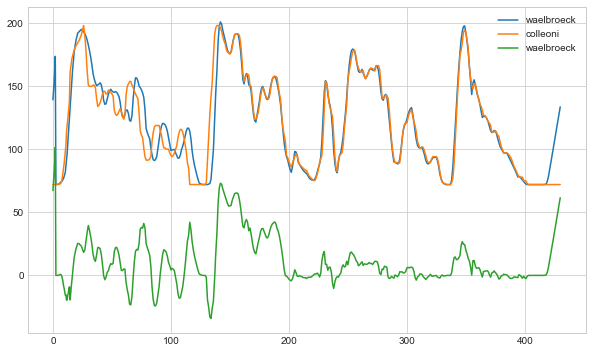

In [86]:
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(global_vol.time, -np.roll(f(global_vol.time),-5) + global_vol.values[0], label="waelbroeck")
ax.plot(global_vol.time, global_vol, label="colleoni")
ax.plot(global_vol.time, -np.roll(f(global_vol.time),-5) + global_vol.values[0] - gr_vol - an_vol - ot_vol - na_vol, label="waelbroeck")
ax.legend()

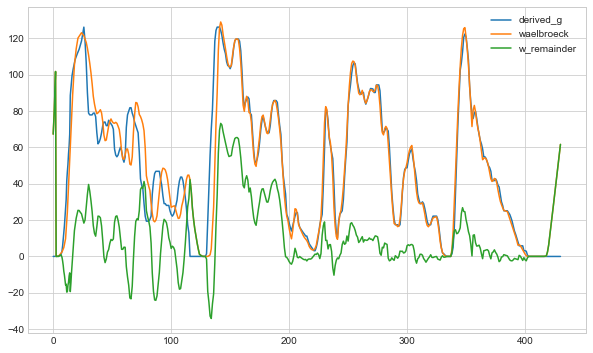

In [67]:
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(global_vol.time, global_vol - global_vol[-1], label='derived_g')
#ax.plot(global_vol.time, er_vol, label='derived_e')
ax.plot(global_vol.time, np.roll(-f(global_vol.time), -5), label="waelbroeck")
ax.plot(global_vol.time, -np.roll(f(global_vol.time), -5) -( na_vol + an_vol + ot_vol + gr_vol - global_vol[-1]), label='w_remainder')
#ax.plot(global_vol.time, -  - na_vol - an_vol - gr_vol + global_vol[-1], label='derived_e')

ax.legend()

In [12]:
#curve[:11].shape
#curve[11:].shape
#curve_stretch.shape
print(times_stretch)

[150.         151.5        153.         154.5        156.
 157.5        159.         160.5        162.         163.5
 165.         165.91666667 166.83333333 167.75       168.66666667
 169.58333333 170.5        171.41666667 172.33333333 173.25
 174.16666667 175.08333333 176.         176.91666667 177.83333333
 178.75       179.66666667 180.58333333 181.5        182.41666667
 183.33333333 184.25       185.16666667 186.08333333 187.
 187.91666667 188.83333333 189.75       190.66666667 191.58333333
 192.5        193.41666667 194.33333333 195.25       196.16666667
 197.08333333 198.         198.91666667 199.83333333 200.75
 201.66666667 202.58333333 203.5        204.41666667 205.33333333
 206.25       207.16666667 208.08333333 209.         209.91666667
 210.83333333 211.75       212.66666667 213.58333333 214.5
 215.41666667 216.33333333 217.25       218.16666667 219.08333333
 220.        ]


In [3]:
from icesea.formats import package_sea_level, package_sea_level_ice
package_sea_level(model_output_dir="/nfs/annie/cm15ogp/experiments/deglaciation_ice_histories/base/", nc_filepath="/nfs/b0029/Data/Oliver/base.nc")

  0%|          | 0/429 [00:00<?, ?it/s]

  0%|          | 0/429 [00:00<?, ?it/s]

# Scaling

In [4]:
ds = xr.open_dataset("GLAC1DHiceF26.nc")

In [10]:
ds.T122KP1

<xarray.DataArray 'T122KP1' (T122KP1: 261)>
array([-26. , -25.9, -25.8, ...,  -0.2,  -0.1,   0. ])
Coordinates:
  * T122KP1  (T122KP1) float64 -26.0 -25.9 -25.8 -25.7 ... -0.3 -0.2 -0.1 0.0
Attributes:
    axis:           T
    standard_name:  time

## Define Regional Mask

<GeoAxesSubplot:>

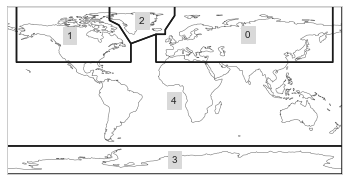

## Load Colleoni Data

In [12]:
ds = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/lhs/scaled/0.nc")
ds

<xarray.Dataset>
Dimensions:      (lat: 512, lon: 1024, time: 430)
Coordinates:
  * lon          (lon) float64 0.0 0.3516 0.7031 1.055 ... 358.9 359.3 359.6
  * lat          (lat) float64 89.73 89.38 89.03 88.68 ... -89.03 -89.38 -89.73
  * time         (time) float64 429.0 428.0 427.0 426.0 ... 3.0 2.0 1.0 -0.0
    spatial_ref  int64 ...
Data variables:
    thickness    (time, lat, lon) float64 ...
Attributes:
    grid_mapping:  spatial_ref

In [ ]:
for index in tqdm(range(8,100)):
    try:
        ds = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/lhs/scaled/{index}.nc")
        ds["time"] = np.abs(ds.time)
        ds.to_netcdf(f"/nfs/b0029/Data/Oliver/output/lhs/scaled/{index}_t.nc")
        ds.close()
    except FileNotFoundError:
        print(f"skipping {index}")

In [17]:
from icesea import formats
col_ice_2 = formats.timelatlon(coords={"lon": col_ice.lon-180, "lat": col_ice.lat - 90, "time": col_ice.time}, variables={"thickness": col_ice.thickness}, variable_attrs={"thickness":{"units": "m", "long_name": "Global Ice Sheet Thickness", "standard_name": "Ice Sheet Thickness"}})
col_ice_2.to_netcdf("/nfs/b0029/Data/Oliver/data/ice/original/dendy/ice6g_colleoni.nc")

In [11]:
col_ice = xr.open_dataset("data/ice/original/dendy/ice6g_colleoni.nc")
col_ice["lat"] = col_ice.lat + 0.5
col_ice = col_ice.assign_coords({"lon": col_ice.lon, "lat": col_ice.lat, "time": col_ice.time})
col_ice

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360, time: 452)
Coordinates:
  * lat         (lat) float64 0.5 1.5 2.5 3.5 4.5 ... 176.5 177.5 178.5 179.5
  * lon         (lon) int64 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time        (time) int64 0 1 2 3 4 5 6 7 ... 444 445 446 447 448 449 450 451
Data variables:
    times       (time) int32 ...
    longitudes  (lon) float32 ...
    latitudes   (lat) float32 ...
    thickness   (time, lat, lon) float32 ...

In [105]:
area = functions.calc_grid_area_geo(config.gl512.lons, np.flip(config.gl512.lats) + 90)

col_ice = xr.open_dataset("data/ice/original/dendy/ice6g_colleoni.nc")
col_ice = xr.open_dataset("data/ice/original/dendy/ice6g.nc")
col_ice["lat"] = col_ice.lat + 0.5
col_ice = col_ice.assign_coords({"lon": col_ice.lon, "lat": col_ice.lat, "time": col_ice.time})
#col_ice.ice.lat_0 = -0.5
#col_ice.ice.sle_volume()

volumes = functions.volume_to_sle(functions.grid_thickness_to_volume_geo(
            lons=col_ice.lon.values,
            lats=col_ice.lat.values,# + 0.5,
            thickness=col_ice.thickness,
        ))
volumes["lat"] = np.flip(col_ice.lat - 90)
volumes["lon"] = col_ice.lon
mask = mask_generator.mask(volumes[0])


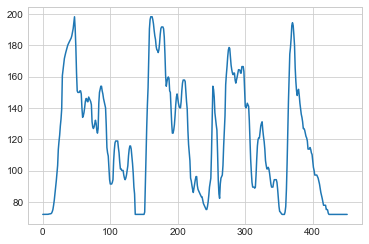

In [5]:
plt.plot(np.sum(volumes,axis=(1,2)))#, er_pgm_volume)

In [6]:
er_pgm_volume = np.sum(volumes.where(mask == 0, 0), axis=(1,2)).sel(time=slice(150, 220))
deglaciation_time = 160

er_pgm_volume_glaciate = er_pgm_volume.sel(time=slice(None, deglaciation_time))
er_pgm_volume_deglaciate = er_pgm_volume.sel(time=slice(deglaciation_time + 1, None))

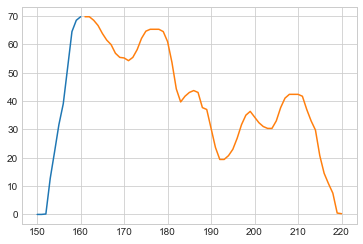

In [7]:
plt.plot(er_pgm_volume_glaciate.time, er_pgm_volume_glaciate)
plt.plot(er_pgm_volume_deglaciate.time, er_pgm_volume_deglaciate)

In [ ]:
hughes_volumes = []
for index in tqdm(range(100)):
    ds_hughes = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/lhs/{index}_lonlat_gl512.nc")
    volume = np.sum(functions.volume_to_sle(ds_hughes.thickness.sel(time=)*area), axis=(1,2)).values[0]
    hughes_volumes.append(volume)

In [8]:
batch_volumes = []
for index in tqdm(range(100)):
    ds_batch = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/batchelor/{index}_lonlat_gl512.nc")
    volume = np.sum(functions.volume_to_sle(ds_batch.thickness*area), axis=(1,2)).values[0]
    batch_volumes.append(volume)

  0%|          | 0/100 [00:00<?, ?it/s]

In [40]:
np.save("batch_volumes.npy", batch_volumes)

In [9]:
print(np.max(batch_volumes)/np.max(er_pgm_volume_deglaciate.values))
max_run_index = np.argmax(batch_volumes)
scale_factor = 0.68

er_pgm_volume_deglaciate_scaled = er_pgm_volume_deglaciate * scale_factor
er_pgm_volume_glaciate_scaled = er_pgm_volume_glaciate * scale_factor

0.6842754133207848


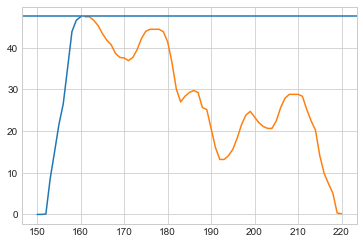

In [10]:
plt.plot(er_pgm_volume_glaciate_scaled.time, er_pgm_volume_glaciate_scaled)
plt.plot(er_pgm_volume_deglaciate_scaled.time, er_pgm_volume_deglaciate_scaled)
plt.axhline(np.max(batch_volumes))

## Load Base Ice Model Run

In [11]:
#ice.dataset.thickness
ds_model_base = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/lhs/{max_run_index}_lonlat_gl512.nc")
total_volumes = np.sum(functions.volume_to_sle(ds_model_base.thickness*area), axis=(1,2)).values
point_volumes = ds_model_base.thickness.values
times = ds_model_base.time.values

ds_batch_base = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/batchelor/{max_run_index}_lonlat_gl512.nc")
batch_total_volumes = np.sum(functions.volume_to_sle(ds_batch_base.thickness*area), axis=(1,2)).values
batch_point_volumes = ds_batch_base.thickness.values

In [12]:
# split data into glaciation/deglaciation phase
split_index = 9

num_glaciation_slices = split_index+2
base_glaciation_slices = np.zeros((num_glaciation_slices, point_volumes.shape[1], point_volumes.shape[2]))
base_glaciation_volumes = np.zeros((num_glaciation_slices))

num_deglaciation_slices = point_volumes.shape[0] - split_index+2
base_deglaciation_slices = np.zeros((num_deglaciation_slices, point_volumes.shape[1], point_volumes.shape[2]))
base_deglaciation_volumes = np.zeros((num_deglaciation_slices))

base_glaciation_slices[1:-1] = point_volumes[:split_index]
base_glaciation_volumes[1:-1] = total_volumes[:split_index]
base_deglaciation_slices[1:-1] = point_volumes[split_index:]
base_deglaciation_volumes[1:-1] = total_volumes[split_index:]

base_glaciation_slices[-1] = batch_point_volumes
base_glaciation_volumes[-1] = batch_total_volumes
base_deglaciation_slices[0] = batch_point_volumes
base_deglaciation_volumes[0] = batch_total_volumes

In [13]:
base_scaled_slices = np.zeros((len(er_pgm_volume_glaciate_scaled)+len(er_pgm_volume_deglaciate_scaled), point_volumes.shape[1], point_volumes.shape[2]))

g_lo, g_hi, g_ratio = scale_params(er_pgm_volume_glaciate_scaled.values, base_glaciation_volumes)
base_scaled_slices[:len(er_pgm_volume_glaciate_scaled)] = scale_from_params(g_lo, g_hi, g_ratio, base_glaciation_slices)
de_lo, de_hi, de_ratio = scale_params(np.flip(er_pgm_volume_deglaciate_scaled.values), np.flip(base_deglaciation_volumes))
base_scaled_slices[len(er_pgm_volume_glaciate_scaled):] = np.flip(scale_from_params(de_lo, de_hi, de_ratio, np.flip(base_deglaciation_slices, axis=0)),axis=0)
#base_scaled_ice = a(lo, hi, ratio, base_deglaciation_slices)
#base_total_scaled_volume = np.sum(functions.volume_to_sle(base_scaled_ice*area), axis=(1,2))

In [26]:
from scipy import interpolate
ds = xr.open_dataset("data/ice6g.nc")
ice6g_times = ds.time.values
num_ice6g_slices = len(ice6g_times)
ice6g = np.zeros((num_ice6g_slices+1,len(config.gl512.lats),len(config.gl512.lons)))
for index in range(num_ice6g_slices):
    f = interpolate.interp2d(np.roll(ds.lon.values % 360, 0), ds.lat.values, np.roll(np.flipud(ds.thickness[index].values), 0), kind='linear')
    ice6g[index+1] = f(config.gl512.lons, config.gl512.lats)

In [27]:
ice6g_sle = functions.volume_to_sle(functions.grid_thickness_to_volume_geo(
            lons=config.gl512.lons,
            lats=np.flip(config.gl512.lats)+90,# + 0.5,
            thickness=ice6g,
        ))
ice6g_sle_t = np.sum(ice6g_sle, axis=(1,2))

In [36]:
target_sle_t = ice6g_sle_t[1]-waelbroeck_gmsl
target_sle_t[target_sle_t < target_sle_t[0]] = target_sle_t[0]
#global_base_sle = scale(target_sle_t, ice6g_sle_t, ice6g_sle)
#global_base_sle_da = xr.Dataset(data_vars = {"volume": (["time", "lat", "lon"], global_base_sle)},coords = {"time": (["time"], waelbroeck_times),"lon": (["lon"], config.gl512.lons),"lat": (["lat"], config.gl512.lats),})
#mask = mask_generator.mask(global_base_sle_da.volume[0])

In [ ]:
plt.plot(target_sle_t)

[]

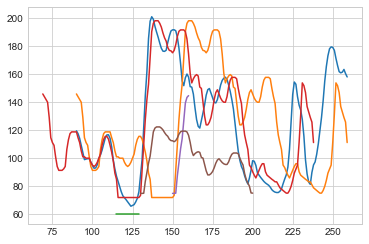

In [18]:
plt.plot(np.arange(90,260),(ice6g_sle_t[1]-waelbroeck_gmsl)[90:260])
plt.plot(np.arange(90,260),np.sum(volumes,axis=(1,2))[:430][90:260])
tmp_lig = np.arange(115, 130)
plt.plot(np.arange(115, 130), np.ones_like(tmp_lig)*60)
plt.plot(np.arange(90,260)-21,np.sum(volumes,axis=(1,2))[:430][90:260])
plt.plot(er_pgm_volume_glaciate_scaled.time, er_pgm_volume_glaciate_scaled.values/scale_factor + 75)
plt.plot(np.arange(130,201), np.concatenate((er_pgm_volume_glaciate_scaled.values,er_pgm_volume_deglaciate_scaled.values))+75)
plt.plot()

NameError: name 'na_sle_t' is not defined

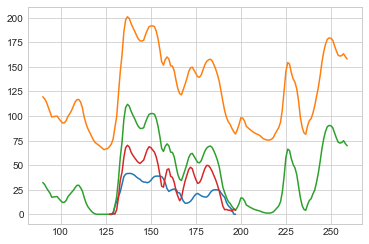

In [143]:
plt.plot(np.arange(130,201)-3,er_pgm_sle_t)
plt.plot(np.arange(90,260),(ice6g_sle_t[1]-waelbroeck_gmsl)[90:260])
plt.plot(np.arange(90,260),(ice6g_sle_t[1]-waelbroeck_gmsl-ot_base_sle_t)[90:260])
plt.plot(np.arange(130,201)-3,(ice6g_sle_t[1]-waelbroeck_gmsl-ot_base_sle_t)[127:198] - er_pgm_sle_t)
plt.plot(np.arange(130,201),na_sle_t)

In [29]:
from pathlib import Path

er_ice6g_sle = xr.ones_like(mask).where(mask==0, 0).values*ice6g_sle
na_ice6g_sle = xr.ones_like(mask).where(mask==1, 0).values*ice6g_sle
ot_ice6g_sle = (xr.ones_like(mask).where(mask==2, 0) + xr.ones_like(mask).where(mask==3, 0) + xr.ones_like(mask).where(mask==4, 0)).values*ice6g_sle

er_ice6g_sle_t = np.sum(er_ice6g_sle, axis=(1,2))
na_ice6g_sle_t = np.sum(na_ice6g_sle, axis=(1,2))
ot_ice6g_sle_t = np.sum(ot_ice6g_sle, axis=(1,2))

ot_base_sle = (xr.ones_like(mask).where(mask==2, 0) + xr.ones_like(mask).where(mask==3, 0) + xr.ones_like(mask).where(mask==4, 0)).values*global_base_sle
ot_base_sle_t = np.sum(ot_base_sle, axis=(1,2))

pgm_ot_base_sle = ot_base_sle[127:198]
pgm_ot_base_sle_t = ot_base_sle_t[127:198]

pgm_target_sle_t = target_sle_t[127:198]


iterate = range(100)
for index in tqdm(iterate):
    # load icesehet model slices
    ds_model = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/lhs/{index}_lonlat_gl512.nc")
    slices = ds_model.thickness.values
    ds_model.close()
    ds_batch = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/batchelor/{index}_lonlat_gl512.nc")
    batch_slice = ds_batch.thickness.values
    ds_batch.close()

    # split into glaciation and deglaciation phases, with a zero slice and batchelor max for both
    glaciation_slices = np.zeros((num_glaciation_slices, point_volumes.shape[1], point_volumes.shape[2]))
    glaciation_slices[1:-1] = slices[:split_index]
    glaciation_slices[-1] = batch_slice
    
    deglaciation_slices = np.zeros((num_deglaciation_slices, point_volumes.shape[1], point_volumes.shape[2]))
    deglaciation_slices[1:-1] = slices[split_index:]
    deglaciation_slices[0] = batch_slice

    # pgm slices
    er_pgm = np.zeros((len(er_pgm_volume_glaciate_scaled)+len(er_pgm_volume_deglaciate_scaled), point_volumes.shape[1], point_volumes.shape[2]))
    er_pgm[:len(er_pgm_volume_glaciate_scaled)] = scale_from_params(g_lo, g_hi, g_ratio, glaciation_slices)
    er_pgm[len(er_pgm_volume_glaciate_scaled):] = np.flip(scale_from_params(de_lo, de_hi, de_ratio, np.flip(deglaciation_slices, axis=0)),axis=0)

    # convert to sle
    er_pgm_sle = functions.volume_to_sle(er_pgm*area)
    er_pgm_sle_t = np.sum(er_pgm_sle, axis=(1,2))
    
    # calculate remaining na component
    na_sle_t = pgm_target_sle_t - (pgm_ot_base_sle_t + er_pgm_sle_t)
    if np.all(na_sle_t >= 0):
    
        # scale na
        na_pgm_sle = scale(na_sle_t, na_ice6g_sle_t, na_ice6g_sle)

        # define the global base series
        global_sle = global_base_sle.copy()

        # substitute custom pgm
        global_sle[127:198] = pgm_ot_base_sle + na_pgm_sle + er_pgm_sle

        # convert from sle volume to thickness
        global_thickness = functions.sle_to_volume(global_sle)/area


        """
            na_volume_neg_index = na_volume < 0
            pgm_angrot = pgm_const.volume.values
            other_slice_volumes = pgm_vol_const.volume.values[na_volumes_neg_index] + na_volume[na_volumes_neg_index]
            pgm_angrot[na_volumes_neg_index] = scale(other_slice_volumes, er_pgm_sle_t)
            global_scaled_ice_volume[130:201] = 

            na_volume[na_volume_neg_index] = np.zeros_like(other_slice_volumes)
            global_scaled_ice_volume[130:201][na_volume_neg_index]
        """
        # output
        Path(f"/nfs/b0029/Data/Oliver/output/lhs_scaled_var/{index}/").mkdir(parents=True, exist_ok=True)

        np.savetxt(f"/nfs/b0029/Data/Oliver/output/lhs_scaled_var/{index}/times", np.flip(-col_ice.time.values[:-22]), delimiter="", fmt="%14.4e")
        for t_index in tqdm(range(len(global_thickness)), leave=False):
            np.savetxt(f"/nfs/b0029/Data/Oliver/output/lhs_scaled_var/{index}/ice{t_index+1}", global_thickness[len(global_thickness)-(1+t_index)], delimiter="", fmt="%16.7e")
    else:
        print(f"member {index} violates N.A. > 0 condition, skipping")
    

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

member 8 violates N.A. > 0 condition, skipping


  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

member 37 violates N.A. > 0 condition, skipping


  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

member 48 violates N.A. > 0 condition, skipping


  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

member 66 violates N.A. > 0 condition, skipping


  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

member 84 violates N.A. > 0 condition, skipping


  0%|          | 0/430 [00:00<?, ?it/s]

member 86 violates N.A. > 0 condition, skipping


  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

member 90 violates N.A. > 0 condition, skipping


  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

member 93 violates N.A. > 0 condition, skipping


  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

member 99 violates N.A. > 0 condition, skipping


In [26]:
8, 37, 48, 66, 84, 86, 90, 93,99

array([68.77052866, 71.29346668, 74.58607433, 79.45325219, 81.65093673,
       87.15399101, 87.40901841, 88.43750621, 89.06279877, 89.08256789,
       89.05534325, 89.07047695, 89.11285685, 89.12240989, 89.07148336,
       89.11729271, 88.99096553, 88.94578716, 88.94221021, 88.95989524,
       89.11046012, 89.08132715, 89.12609555, 89.12295502, 89.12275874,
       89.1255067 , 89.07081631, 88.99399547, 88.46259676, 88.08634057,
       87.86578051, 88.23453613, 88.40353106, 88.26551853, 87.82049853,
       87.79883251, 87.47340893, 87.07049076, 87.15457221, 87.15618797,
       87.1504073 , 87.15484688, 87.1048329 , 87.05314702, 87.42704365,
       87.67966942, 87.73210118, 87.51457436, 87.30203073, 87.09447028,
       87.06543782, 87.22034984, 87.55920636, 87.89329635, 88.11060651,
       88.21113683, 88.25706879, 88.15393854, 87.9017461 , 87.59928849,
       87.22533303, 87.07907592, 87.15555412, 87.14930122, 83.1024492 ,
       81.57139915, 81.00066775, 80.47563779, 79.38012091, 78.30

In [46]:
global_base_thickness = functions.sle_to_volume(global_base_sle)/area
Path(f"/nfs/b0029/Data/Oliver/output/lhs_scaled/base/").mkdir(parents=True, exist_ok=True)
np.savetxt(f"/nfs/b0029/Data/Oliver/output/lhs_scaled/base/times", np.flip(-col_ice.time.values[:-22]), fmt="%i")
for t_index, _ in tqdm(enumerate(global_base_thickness)):
    np.savetxt(f"/nfs/b0029/Data/Oliver/output/lhs_scaled/base/ice{t_index+1}", global_base_thickness[len(global_base_thickness)-(1+t_index)], delimiter="", fmt="%16.7e")


0it [00:00, ?it/s]

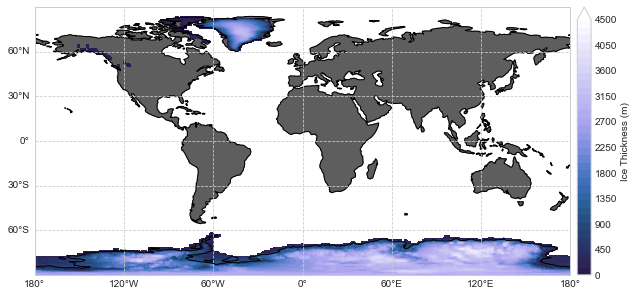

In [155]:
mp = MapPlot()
mp.plot_ice(global_thickness[0], config.gl512.lons, config.gl512.lats)
mp.colorbar()

In [160]:
times = -col_ice.time.values[:-22]
for index, time in tqdm(enumerate(times)):
    mp = MapPlot(title=f"{time} ka")
    mp.plot_ice(global_thickness[index], config.gl512.lons, config.gl512.lats)
    mp.colorbar()
    mp.save(f"ice_fixed{index}.png")

0it [00:00, ?it/s]

NameError: name 'scaled_volume' is not defined

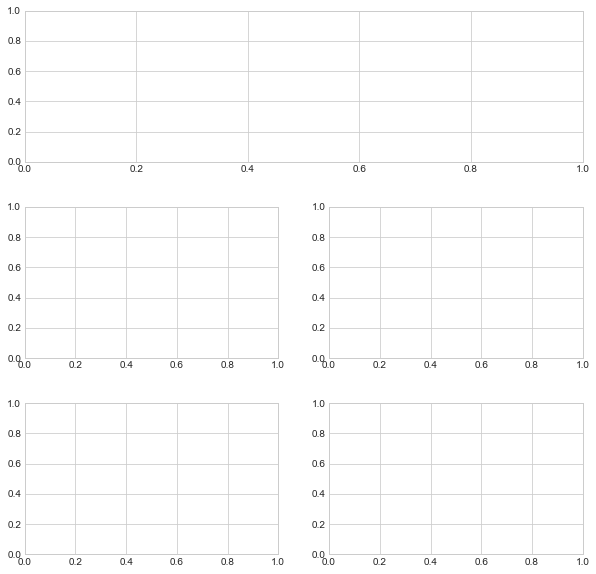

In [52]:
grid = plt.GridSpec(3, 2, wspace=0.2, hspace=0.3)
fig = plt.figure(figsize=(10, 10))

#plt.subplot(grid[0, 1:])
global_ax = fig.add_subplot(grid[0,:])
er_ax = fig.add_subplot(grid[1, 0])
na_ax = fig.add_subplot(grid[1, 1])
gr_ax = fig.add_subplot(grid[2, 0])
an_ax = fig.add_subplot(grid[2, 1])

#global_scaled_ice_volume
scaled_volume

global_ax.plot(np.sum(global_sle, axis=(1,2)))
global_ax.set_xlim([420,0])
global_ax.set_title("Global")
global_ax.set_xlabel("Time (ka)")
global_ax.set_ylabel("SLE Ice Volume (m)")
er_ax.plot(np.sum(global_sle*xr.ones_like(mask).where(mask==0, 0).values, axis=(1,2)), color="C1")
er_ax.set_ylim([0,90])
er_ax.set_xlim([420,0])
er_ax.set_title("Eurasia")
er_ax.set_xlabel("Time (ka)")
er_ax.set_ylabel("SLE Ice Volume (m)")
na_ax.plot(np.sum(global_sle*xr.ones_like(mask).where(mask==1, 0).values, axis=(1,2)), color="C2")
na_ax.set_ylim([0,90])
na_ax.set_xlim([420,0])
na_ax.set_title("North America")
na_ax.set_xlabel("Time (ka)")
na_ax.set_ylabel("SLE Ice Volume (m)")
gr_ax.plot(np.sum(global_sle*xr.ones_like(mask).where(mask==2, 0).values, axis=(1,2)), color="C3")
gr_ax.set_ylim([0,90])
gr_ax.set_xlim([420,0])
gr_ax.set_title("Greenland")
gr_ax.set_xlabel("Time (ka)")
gr_ax.set_ylabel("SLE Ice Volume (m)")
an_ax.plot(np.sum(global_sle*xr.ones_like(mask).where(mask==3, 0).values, axis=(1,2)), color="C4")
an_ax.set_ylim([0,90])
an_ax.set_xlim([420,0])
an_ax.set_title("Antartica")
an_ax.set_xlabel("Time (ka)")
an_ax.set_ylabel("SLE Ice Volume (m)")
#fig.savefig("vol_fixed.png", dpi=300, bbox_inches="tight")

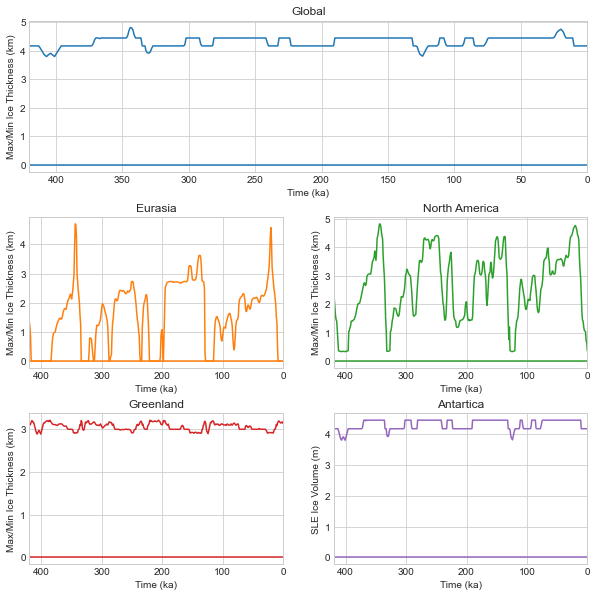

In [159]:
grid = plt.GridSpec(3, 2, wspace=0.2, hspace=0.3)
fig = plt.figure(figsize=(10, 10))

#plt.subplot(grid[0, 1:])
global_ax = fig.add_subplot(grid[0,:])
er_ax = fig.add_subplot(grid[1, 0])
na_ax = fig.add_subplot(grid[1, 1])
gr_ax = fig.add_subplot(grid[2, 0])
an_ax = fig.add_subplot(grid[2, 1])

global_ax.plot(np.max(global_thickness, axis=(1,2))/1000, color="C0")
global_ax.plot(np.min(global_thickness, axis=(1,2))/1000, color="C0")
global_ax.set_xlim([420,0])
global_ax.set_title("Global")
global_ax.set_xlabel("Time (ka)")
global_ax.set_ylabel("Max/Min Ice Thickness (km)")
er_ax.plot(np.max(global_thickness*xr.ones_like(mask).where(mask==0, 0).values, axis=(1,2))/1000, color="C1")
er_ax.plot(np.min(global_thickness*xr.ones_like(mask).where(mask==0, 0).values, axis=(1,2))/1000, color="C1")


#er_ax.set_ylim([0,90])
er_ax.set_xlim([420,0])
er_ax.set_title("Eurasia")
er_ax.set_xlabel("Time (ka)")
er_ax.set_ylabel("Max/Min Ice Thickness (km)")
na_ax.plot(np.max(global_thickness*xr.ones_like(mask).where(mask==1, 0).values, axis=(1,2))/1000, color="C2")
na_ax.plot(np.min(global_thickness*xr.ones_like(mask).where(mask==1, 0).values, axis=(1,2))/1000, color="C2")


#na_ax.set_ylim([0,90])
na_ax.set_xlim([420,0])
na_ax.set_title("North America")
na_ax.set_xlabel("Time (ka)")
na_ax.set_ylabel("Max/Min Ice Thickness (km)")
gr_ax.plot(np.max(global_thickness*xr.ones_like(mask).where(mask==2, 0).values, axis=(1,2))/1000, color="C3")
gr_ax.plot(np.min(global_thickness*xr.ones_like(mask).where(mask==2, 0).values, axis=(1,2))/1000, color="C3")


#gr_ax.set_ylim([0,90])
gr_ax.set_xlim([420,0])
gr_ax.set_title("Greenland")
gr_ax.set_xlabel("Time (ka)")
gr_ax.set_ylabel("Max/Min Ice Thickness (km)")
an_ax.plot(np.max(global_thickness*xr.ones_like(mask).where(mask==3, 0).values, axis=(1,2))/1000, color="C4")
an_ax.plot(np.min(global_thickness*xr.ones_like(mask).where(mask==3, 0).values, axis=(1,2))/1000, color="C4")


#an_ax.set_ylim([0,90])
an_ax.set_xlim([420,0])
an_ax.set_title("Antartica")
an_ax.set_xlabel("Time (ka)")
an_ax.set_ylabel("SLE Ice Volume (m)")
fig.savefig("minmax_fixed.png", dpi=300, bbox_inches="tight")

In [161]:
import imageio

images = []
for index in range(430):
    images.append(imageio.imread(f"ice_fixed{index}.png"))
images = images[::-1]
imageio.mimsave("ice_fixed.gif", images, fps=5)

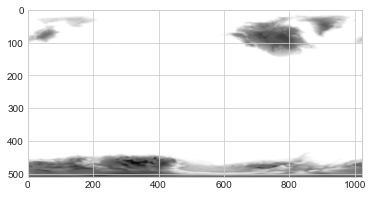

In [32]:
plt.imshow(np.genfromtxt("sea_level_test/tarasov/ice2"))

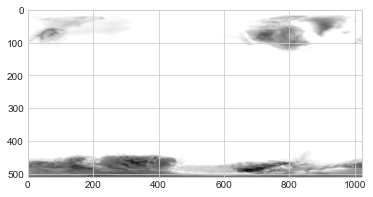

In [31]:
plt.imshow(global_scaled_ice_thickness[180])

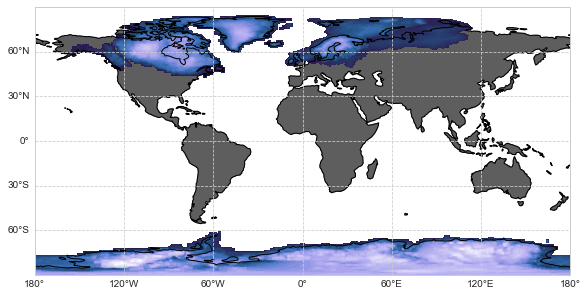

In [30]:
mp = MapPlot()
mp.plot_ice(global_scaled_ice_thickness[180], config.gl512.lons, config.gl512.lats)

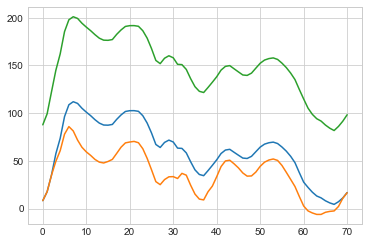

In [247]:
plt.plot(na_volume+np.sum(functions.volume_to_sle(scaled_slices*area),axis=(1,2)))
plt.plot(na_volume)
plt.plot(scale_curve[130:201])

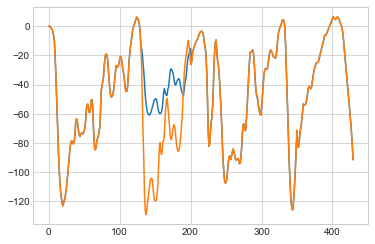

In [241]:
plt.plot(-np.sum(global_scaled_ice_volume-global_scaled_ice_volume[0],axis=(1,2)))
plt.plot(waelbroeck_gmsl)

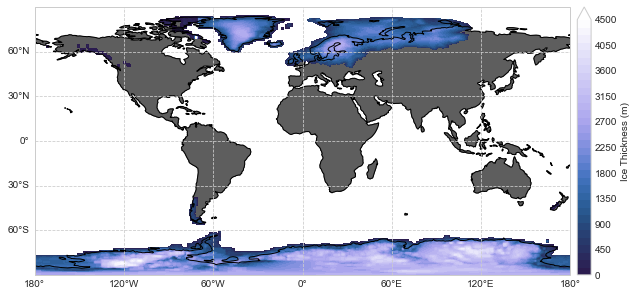

In [230]:
mp = MapPlot()

mp.plot_ice(functions.sle_to_volume(global_scaled_ice_volume[150]/area), lons=config.gl512.lons, lats=config.gl512.lats)
mp.colorbar()

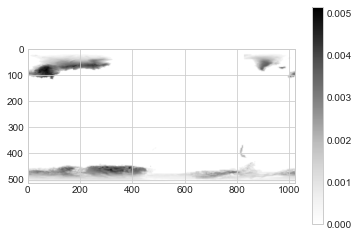

In [144]:
# pgm = gr + an + other || + na || + er

waelbroeck_gmsl
total_scaled_volumes

pgm_er = functions.volume_to_sle(functions.grid_thickness_to_volume_geo(
            lons=config.gl512.lons,
            lats=np.flip(config.gl512.lats)+90,# + 0.5,
            thickness=scaled_slices,
        ))

# scale north america

pgm = pgm_gr.volume.values + pgm_an.volume.values + pgm_ot.volume.values + pgm_er
plt.imshow(pgm[10])
plt.colorbar()

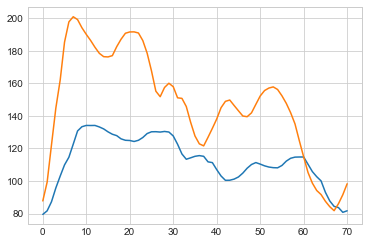

In [146]:
plt.plot(np.sum(pgm, axis=(1,2)))
plt.plot(np.sum(scaled_ice6g.volume, axis=(1,2)).sel(time=slice(130, 200)))

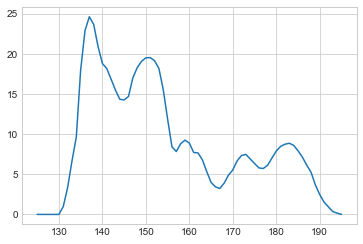

In [121]:
#.sel(time=slice(150, 220))
plt.plot(scaled_ice6g.time.sel(time=slice(130, 200)), np.sum(scaled_ice6g.volume.where(mask == 0, 0), axis=(1,2)).sel(time=slice(130, 200)))

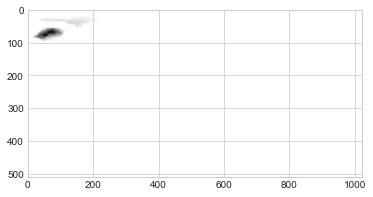

In [116]:
plt.imshow(scaled_ice6g.volume[50].where(mask == 0, 0))

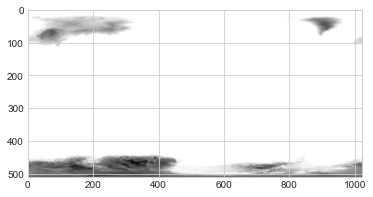

In [51]:
z_new = f(config.gl512.lons, config.gl512.lats)
plt.imshow(base_scaled_slices[20]+z_new)

In [43]:


#XLONGLOBP5_mod = ice.XLONGLOBP5.values % 360
#min_id = np.where(XLONGLOBP5_mod == XLONGLOBP5_mod.min())[0][0]

from scipy import interpolate
ice6g_times = ds.time.values
for index, _ in enumerate(times):
    f = interpolate.interp2d(np.roll(ice.lon.values % 360, min_id), ice.lat.values, np.roll(np.flipud(ice.HGLOBH[index].values), min_id), kind='linear')
    #z_new = f(config.gl512.lons, config.gl512.lats)

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 48)
Coordinates:
  * lon          (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat          (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time         (time) int64 0 500 1000 1500 2000 ... 23000 24000 25000 26000
    spatial_ref  int64 ...
Data variables:
    thickness    (time, lat, lon) float64 ...
Attributes:
    grid_mapping:  spatial_ref

In [23]:
#ice.dataset.thickness
iterate = range(100)
split_index = 9
min_i = min(iterate)
total_scaled_volumes = np.zeros((len(iterate),len(er_pgm_volume)))
for i in tqdm(iterate):
    model_ds = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/lhs/{index}_lonlat_gl512.nc")
    batch_ds = xr.open_dataset(f"/nfs/b0029/Data/Oliver/output/batchelor/{index}_lonlat_gl512.nc")
    batch_point_volumes = ds_batch_base.thickness.values
    glaciation_point_volumes = model_ds.thickness.values[:split_index]
    glaciation_point_volumes = np.append(glaciation_point_volumes,batch_point_volumes, axis=0)
    glaciation_point_volumes = np.insert(glaciation_point_volumes, 0, np.zeros_like(glaciation_point_volumes[0]), axis=0)
    
    scaled_ice = a(lo, hi, ratio, glaciation_point_volumes)
    total_scaled_volume = np.sum(functions.volume_to_sle(scaled_ice*area), axis=(1,2))
    total_scaled_volumes[index] = total_scaled_volume

  0%|          | 0/100 [00:00<?, ?it/s]

NameError: name 'lo' is not defined

In [ ]:

print(glaciation_point_volumes.shape)
print(batch_point_volumes.shape)
glaciation_total_volumes = np.append(glaciation_total_volumes,batch_total_volumes[0])
glaciation_point_volumes = np.append(glaciation_point_volumes,batch_point_volumes, axis=0)
print(glaciation_point_volumes.shape)

In [ ]:

indexes = np.arange(len(glaciation_total_volumes) + len(deglaciation_total_volumes) + 1)
plot = LinePlot()
plot.plot(indexes[:len(glaciation_total_volumes)], glaciation_total_volumes, ls='', marker='x', ms=6,mew=1.5, label="Glaciation", c="#437075")
plot.plot(indexes[len(glaciation_total_volumes):len(glaciation_total_volumes)+len(deglaciation_total_volumes)], deglaciation_total_volumes, ls='', marker='x', ms=6,mew=1.5, label="Deglaciation", c="#A20702")
#plot.y_range([0,20])
#plot.x_range([38,8])
plot.x_label("Geometry Index")
plot.y_label("Eurasian SLE Ice Volume (m)")
#plot.plot_fill(glaciation_times/1000, total_volumes[:split_index], np.zeros_like(total_volumes[:split_index]), alpha=0.1, color="#437075")
#plot.plot_fill(times[split_index-1:]/1000, total_volumes[split_index-1:], np.zeros_like(total_volumes[split_index-1:]), alpha=0.1, color="#A20702")
plot.legend(loc="upper left")
#plot.save("scaling_plots/base_model_output.png")

In [528]:


lo, hi, ratio = scale_order(glaciation_total_volumes, col_sle_volume)
base_scaled_ice = a(lo, hi, ratio, glaciation_point_volumes)
base_total_scaled_volume = np.sum(functions.volume_to_sle(base_scaled_ice*area), axis=(1,2))

In [50]:
plt.imshow(base_scaled_ice[20]+z_new)

NameError: name 'base_scaled_ice' is not defined

In [561]:
#ice.dataset.thickness
iterate = range(100)
split_index = 9
min_i = min(iterate)
total_scaled_volumes = np.zeros((len(iterate),len(col_sle_volume)))
for i in tqdm(iterate):
    model_ds = xr.open_dataset(f"output/lhs/{i}_lonlat_gl512.nc")
    batch_ds = xr.open_dataset(f"output/batchelor/{i}_lonlat_gl512.nc")
    batch_point_volumes = ds_batch_base.thickness.values
    glaciation_point_volumes = model_ds.thickness.values[:split_index]
    glaciation_point_volumes = np.append(glaciation_point_volumes,batch_point_volumes, axis=0)
    glaciation_point_volumes = np.insert(glaciation_point_volumes, 0, np.zeros_like(glaciation_point_volumes[0]), axis=0)
    
    scaled_ice = a(lo, hi, ratio, glaciation_point_volumes)
    total_scaled_volume = np.sum(functions.volume_to_sle(scaled_ice*area), axis=(1,2))
    total_scaled_volumes[int(i-min_i)] = total_scaled_volume

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
scale_factor = 0.5
col_sle_volume = np.load("col_sle_volume_values.npy")[140:230]*scale_factor
col_times = np.arange(0,452)[140:230]

In [171]:
change_of_sign(total_volumes)

([array([0, 1, 2, 3, 4, 5, 6, 7, 8])],
 [array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])])

In [120]:
dendy_sle_volume = np.load("dendy_sle_volume_values.npy")[140:230]
lam_sle_volume = np.load("lam_sle_volume_values.npy")[140:230]

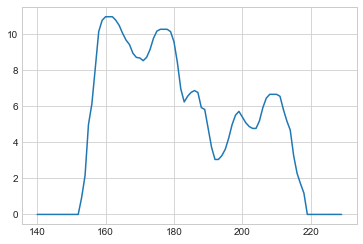

In [195]:
plt.plot(col_times,col_sle_volume)

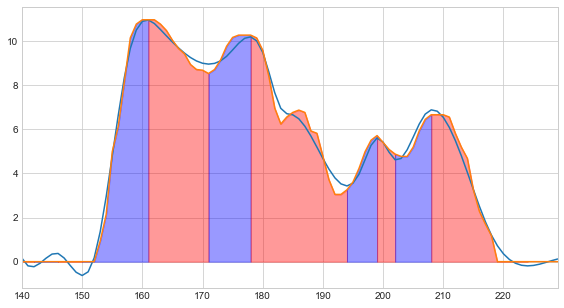

In [209]:
from scipy.interpolate import splrep, splev
#plt.plot(col_sle_volume)
#np.sign(np.diff(np.sign(np.diff(np.around(col_sle_volume, decimals=100)))))

# remove duplicates from series for inflection analysis
#compressed_series, duplicate_store = duplicate_compress(series)
#
#
#np.around(col_sle_volume, decimals=1)
bspl = splrep(col_times,col_sle_volume,s=10)
smoothed_volume = splev(col_times,bspl)
points_inflection_type = np.sign(np.diff(np.sign(np.diff(smoothed_volume))))
#points_inflection_type = duplicate_uncompress(
#    points_inflection_type, duplicate_store, replacement_value=0
#)
# change in actual values -> sign of this change
# change in change (+ve, -ve) -> sign of change (+1, -1)

# start and end points are always not inflection
points_inflection_type = np.insert(
    points_inflection_type, [0, points_inflection_type.size], [0, 0]
)
inflection_points = np.nonzero(points_inflection_type)[0]

plot = LinePlot()
plot.plot(col_times,smoothed_volume)
plot.plot(col_times,col_sle_volume)

previous_point = 0
c = "blue"
for point in inflection_points:
    if c == "red":
        c = "blue"
    elif c == "blue":
        c = "red"
    
    plot.plot_fill(col_times[previous_point:point+1], np.zeros_like(col_sle_volume[previous_point:point+1]),col_sle_volume[previous_point:point+1], color=c)
    previous_point = point




In [2]:
scale_factor = 0.5
col_sle_volume = np.load("col_sle_volume_values.npy")[140:230]*scale_factor
col_times = np.arange(0,452)[140:230]

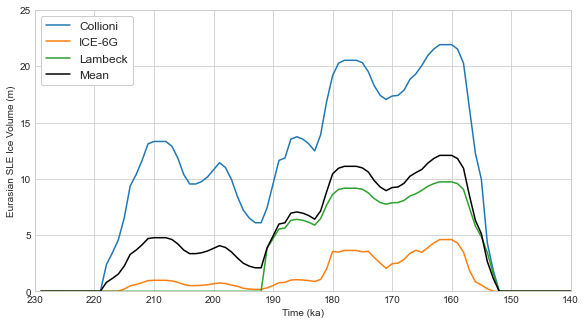

In [129]:
plot = LinePlot()
plot.plot(col_times, col_sle_volume/scale_factor, label="Collioni")
plot.plot(col_times, dendy_sle_volume, label="ICE-6G")
plot.plot(col_times, lam_sle_volume, label="Lambeck")
plot.plot(col_times, np.mean(np.vstack([col_sle_volume/scale_factor, dendy_sle_volume,lam_sle_volume]),axis=0), c="black", label="Mean")
plot.y_range([0,25])
plot.x_range([230,140])
plot.x_label("Time (ka)")
plot.y_label("Eurasian SLE Ice Volume (m)")
plot.legend(loc="upper left")
#plot.plot_fill(col_times, np.min(total_scaled_volumes, axis=0),np.max(total_scaled_volumes, axis=0))

## Load scale volume series data

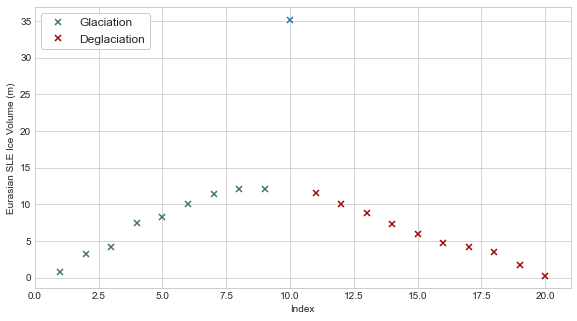

In [462]:
ds_batch_model_base = xr.open_dataset(f"output/batchelor/1_lonlat_gl512.nc")
batch_volume = np.sum(functions.volume_to_sle(ds_batch_model_base.thickness*area), axis=(1,2)).values
batch_volume

indexes = np.arange(0,len(glaciation_total_volumes) + len(deglaciation_total_volumes) + 1) + 1

plot = LinePlot()
plot.plot(indexes[:len(glaciation_total_volumes)], glaciation_total_volumes, ls='', marker='x', ms=6,mew=1.5, label="Glaciation", c="#437075")
plot.plot(indexes[len(glaciation_total_volumes)], batch_volume, ls='', marker='x', ms=6,mew=1.5)
plot.plot(indexes[len(glaciation_total_volumes)+1:], deglaciation_total_volumes, ls='', marker='x', ms=6,mew=1.5, label="Deglaciation", c="#A20702")
#plot.y_range([0,14])
plot.x_range([0,indexes[-1]+1])
plot.x_label("Index")
plot.y_label("Eurasian SLE Ice Volume (m)")
#plot.plot_fill(glaciation_times/1000, total_volumes[:split_index], np.zeros_like(total_volumes[:split_index]), alpha=0.1, color="#437075")
#plot.plot_fill(times[split_index-1:]/1000, total_volumes[split_index-1:], np.zeros_like(total_volumes[split_index-1:]), alpha=0.1, color="#A20702")
plot.legend(loc="upper left")
#plot.save("scaling_plots/base_model_output.png")

In [439]:
#ice.dataset.thickness
ds_model_base = xr.open_dataset(f"output/lhs/1_lonlat_gl512.nc")
area = functions.calc_grid_area_geo(ds_model_base.lon.values, np.flip(ds_model_base.lat.values) + 90)
total_volumes = np.sum(functions.volume_to_sle(ds_model_base.thickness*area), axis=(1,2)).values
point_volumes = ds_model_base.thickness.values
times = ds_model_base.time.values

In [440]:
# split data into single glaciation phase
split_index = 9
glaciation_total_volumes = total_volumes[:split_index]
glaciation_point_volumes = point_volumes[:split_index]
glaciation_times = times[:split_index]
deglaciation_total_volumes = total_volumes[split_index:]
deglaciation_point_volumes = point_volumes[split_index:]
deglaciation_times = times[split_index:]

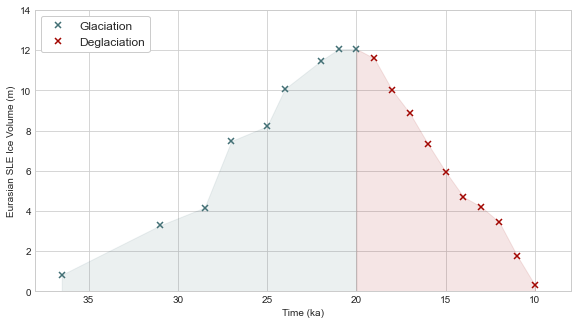

In [441]:
plot = LinePlot()
plot.plot(glaciation_times/1000, glaciation_total_volumes, ls='', marker='x', ms=6,mew=1.5, label="Glaciation", c="#437075")
plot.plot(deglaciation_times/1000, deglaciation_total_volumes, ls='', marker='x', ms=6,mew=1.5, label="Deglaciation", c="#A20702")
plot.y_range([0,14])
plot.x_range([38,8])
plot.x_label("Time (ka)")
plot.y_label("Eurasian SLE Ice Volume (m)")
plot.plot_fill(glaciation_times/1000, total_volumes[:split_index], np.zeros_like(total_volumes[:split_index]), alpha=0.1, color="#437075")
plot.plot_fill(times[split_index-1:]/1000, total_volumes[split_index-1:], np.zeros_like(total_volumes[split_index-1:]), alpha=0.1, color="#A20702")
plot.legend(loc="upper left")
#plot.save("scaling_plots/base_model_output.png")

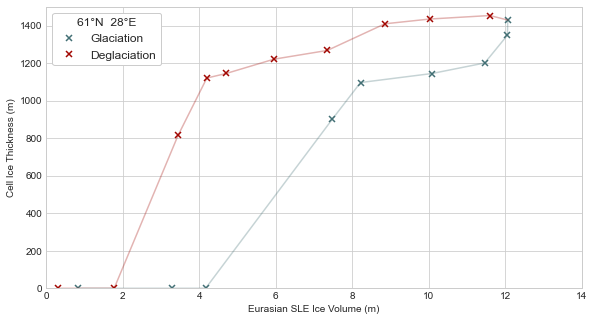

In [219]:
plot = LinePlot()
plot.plot(glaciation_total_volumes, glaciation_point_volumes[:,80,80], ls='', marker='x', ms=6,mew=1.5, label="Glaciation", c="#437075")
plot.plot(glaciation_total_volumes, glaciation_point_volumes[:,80,80],c="#437075", alpha=0.3)
plot.plot(deglaciation_total_volumes, deglaciation_point_volumes[:,80,80], ls='', marker='x', ms=6,mew=1.5, label="Deglaciation", c="#A20702")
plot.plot(total_volumes[split_index-1:], point_volumes[split_index-1:][:,80,80],c="#A20702",alpha=0.3)
plot.y_range([0,1500])
plot.x_range([0,14])
plot.x_label("Eurasian SLE Ice Volume (m)")
plot.y_label("Cell Ice Thickness (m)")
plot.legend(title="61°N  28°E")
#plot.save("scaling_plots/base_model_output_cell.png")

In [32]:
glaciation_total_volumes = np.insert(glaciation_total_volumes, 0, 0)
glaciation_point_volumes = np.insert(glaciation_point_volumes, 0, np.zeros_like(glaciation_point_volumes[0]), axis=0)

In [33]:
def scale_order(total_volumes, target_volumes):
    indices = np.searchsorted(total_volumes,target_volumes)
    indices = indices.clip(1, len(total_volumes)-1).astype(int)
    lo = indices - 1
    hi = indices
    
    x_lo = total_volumes[lo]
    x_hi = total_volumes[hi]
    
    ratio = (target_volumes - x_lo)/(x_hi - x_lo)
    return lo, hi, ratio


lo, hi, ratio = scale_order(glaciation_total_volumes, col_sle_volume)

In [34]:
def a(lo, hi, ratio, slices):
    return (slices[hi] - slices[lo])*ratio[:,None,None] + slices[lo]

base_scaled_ice = a(lo, hi, ratio, glaciation_point_volumes)
base_total_scaled_volume = np.sum(functions.volume_to_sle(base_scaled_ice*area), axis=(1,2))

In [18]:
#ice.dataset.thickness
iterate = range(2,100)
split_index = 9
min_i = min(iterate)
total_scaled_volumes = np.zeros((len(iterate),len(col_sle_volume)))
for i in tqdm(iterate):
    model_ds = xr.open_dataset(f"output/lhs/{i}_lonlat_gl512.nc")
    glaciation_point_volumes = model_ds.thickness.values[:split_index]
    glaciation_point_volumes = np.insert(glaciation_point_volumes, 0, np.zeros_like(glaciation_point_volumes[0]), axis=0)
    
    scaled_ice = a(lo, hi, ratio, glaciation_point_volumes)
    total_scaled_volume = np.sum(functions.volume_to_sle(scaled_ice*area), axis=(1,2))
    total_scaled_volumes[int(i-min_i)] = total_scaled_volume

  0%|          | 0/98 [00:00<?, ?it/s]

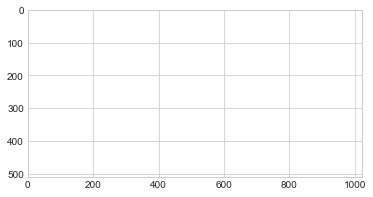

In [217]:
plt.imshow(scaled_ice[80])

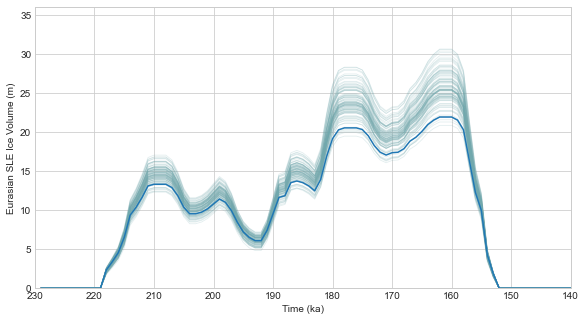

In [484]:
plot = LinePlot()
for volumes in total_scaled_volumes:
    plot.plot(col_times, volumes/0.5, c="#71a8ad", alpha=0.2, linewidth=0.8)

#plot.plot(col_times, total_scaled_volume)
plot.plot(col_times, col_sle_volume/0.5, c="C0")
plot.y_range([0,18/0.5])
plot.x_range([230,140])
plot.x_label("Time (ka)")
plot.y_label("Eurasian SLE Ice Volume (m)")
#plot.save("scaling_plots/scaled_col.png")

In [60]:
original_model_volumes = np.zeros((len(iterate),19))
for i in tqdm(iterate):
    model_ds = xr.open_dataset(f"output/lhs/{i}_lonlat_gl512.nc")
    original_model_volumes[i-min_i] = np.sum(functions.volume_to_sle(model_ds.thickness.values*area), axis=(1,2))
    

  0%|          | 0/98 [00:00<?, ?it/s]

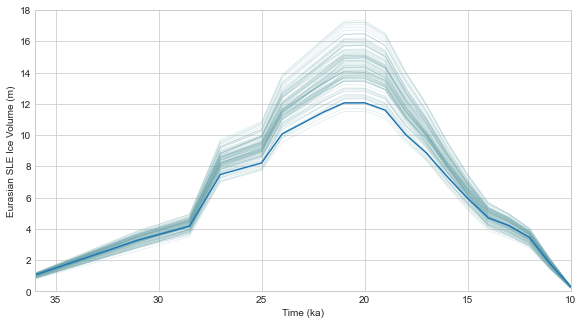

In [220]:
plot = LinePlot()
for volumes in original_model_volumes:
    plot.plot(times/1000, volumes, c="#71a8ad", alpha=0.2, linewidth=0.8)

#plot.plot(col_times, total_scaled_volume)
plot.plot(times/1000, total_volumes, c="C0")
plot.y_range([0,18])
plot.x_range([36,10])
plot.x_label("Time (ka)")
plot.y_label("Eurasian SLE Ice Volume (m)")
#plot.save("scaling_plots/base_model_dist.png")
#plot.plot_fill(col_times, np.min(total_scaled_volumes, axis=0),np.max(total_scaled_volumes, axis=0))

In [86]:
total_scaled_volumes = np.sum(functions.volume_to_sle(scaled_ice*area), axis=(1,2))


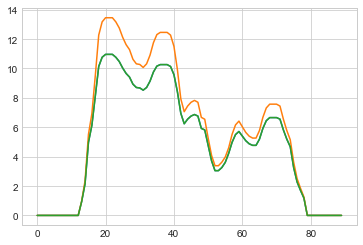

In [88]:
plt.plot(total_scaled_volumes)
plt.plot(total_scaled_volumes_2)
plt.plot(col_sle_volume)

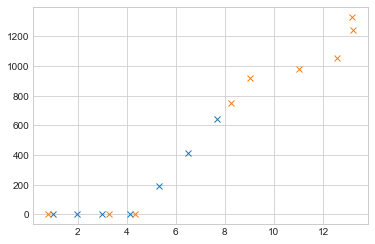

In [553]:
def y_from_ratio_test_new(x_hi, x_lo, y_hi, y_lo, ratio):
    x_dist = ((x_hi - x_lo))
    y_dist = ((y_hi - y_lo))
    x_new = (ratio * x_dist) + x_lo
    y_new = (ratio * y_dist) + y_lo
    return x_new, y_new
x_new, y_new = y_from_ratio_test_new(x_hi, x_lo, y_hi[:,80,80], y_lo[:,80,80], ratio)
plt.plot(x_new, y_new,'x')
plt.plot(split_total_volumes_new,split_point_volumes_new[:,80,80], 'x')
##print(target_volumes)
#print(split_point_volumes_new[:4,80,80])

[ 6.02969238  6.02969238  6.02969238  1.13730592 15.23804083 15.23804083
 15.23804083] [0.03924639 1.43546042 4.83167446 0.55140103 0.45713604 2.80937277
 7.16160949]
less than zero!
[1 2 3 4 5 6 7]
[  0.          0.          0.        748.2684014]


<ipython-input-551-b9c97276b1c1>:12: RuntimeWarning: invalid value encountered in sqrt
  y_new = np.sqrt(sqr_term) + y_lo


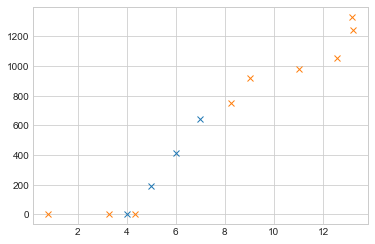

In [551]:
def y_from_ratio_test(x_hi, x_lo, y_hi, y_lo, ratio, x):
    assert np.all(x >= x_lo)
    assert np.all(x <= x_hi)
    x_dist = ((x_hi - x_lo)**2)
    x_dist_new = ((x - x_lo)**2)
    y_dist = ((y_hi - y_lo)**2)
    ratio_sqr = (ratio**2)
    sqr_term = ratio_sqr * (y_dist + x_dist) - x_dist_new
    print(x_dist, x_dist_new)
    if np.any(sqr_term < 0):
        print("less than zero!")
    y_new = np.sqrt(sqr_term) + y_lo
    return y_new
y_new = y_from_ratio_test(x_hi, x_lo, y_hi[:,80,80], y_lo[:,80,80], ratio, target_volumes)
plt.plot(target_volumes, y_new,'x')
plt.plot(split_total_volumes_new,split_point_volumes_new[:,80,80], 'x')
print(target_volumes)
print(split_point_volumes_new[:4,80,80])

[[[ 6.02969238]]

 [[ 6.02969238]]

 [[ 6.02969238]]

 [[ 1.13730592]]

 [[15.23804083]]

 [[15.23804083]]

 [[15.23804083]]] [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

<ipython-input-547-df5181aca75b>:12: RuntimeWarning: invalid value encountered in sqrt
  y_new = np.sqrt(sqr_term) + y_lo


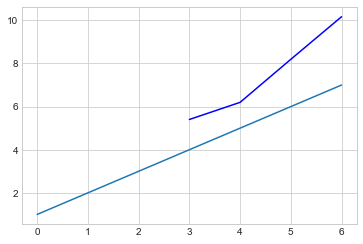

In [547]:
def y_from_ratio(x_hi, x_lo, y_hi, y_lo, ratio, x):
    assert np.all(x >= x_lo)
    assert np.all(x <= x_hi)
    x_dist = ((x_hi - x_lo)**2)[:,None, None]
    x_dist_new = ((target_volumes - x_lo)**2)[:,None, None]
    y_dist = ((y_hi - y_lo)**2)
    ratio_sqr = (ratio**2)[:,None, None]
    sqr_term = ratio_sqr * (y_dist + x_dist) - x_dist_new
    if np.any(sqr_term < 0):
        print("less than zero!")
    y_new = np.sqrt(sqr_term) + y_lo
    return y_new

plt.plot(target_volumes)

ds_hughes_2 = xr.open_dataset(f"output/lhs/2_lonlat_gl512.nc")
total_volumes_new = np.sum(functions.volume_to_sle(ds_hughes_2.thickness*area), axis=(1,2)).values
split_total_volumes_new = total_volumes_new[:split_index]
point_volumes_new = ds_hughes_2.thickness.values
split_point_volumes_new = point_volumes_new[:split_index]

x_lo = split_total_volumes_new[lo]
x_hi = split_total_volumes_new[hi]
y_lo = split_point_volumes_new[lo]
y_hi = split_point_volumes_new[hi]
y_new = y_from_ratio(x_hi, x_lo, y_hi, y_lo, ratio, target_volumes)

plt.plot(np.sum(functions.volume_to_sle(y_new*area), axis=(1,2)), c="blue")

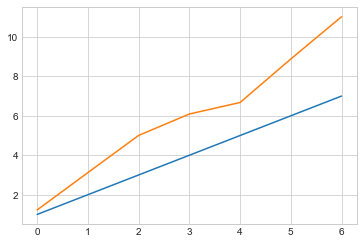

In [518]:
plt.plot(target_volumes)
plt.plot(np.sum(functions.volume_to_sle(y_new*area), axis=(1,2)))

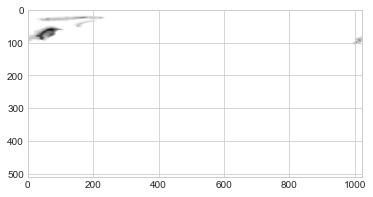

In [515]:
plt.imshow(y_new[6])

In [503]:
x_lo = split_total_volumes[lo]
x_hi = split_total_volumes[hi]
y_lo = split_point_volumes[lo]
y_hi = split_point_volumes[hi]

#y_new = y_from_ratio(x_hi[-1], x_lo[-1], y_hi[-1,80,80], y_lo[-1,80,80], ratio[-1], target_volumes[-1])



#y_new = np.sqrt((x_dist + y_dist - (x_dist_new * ratio[-1]**2)) / (ratio[-1]**2)) + y_lo[-1,80,80]
#plt.plot(target_volumes[-1], y_new, 'x')
#plt.imshow(split_point_volumes[-1])

y_new.shape

(7, 512, 1024)

In [ ]:
y_i = 80
x_i = 40
plt.plot(split_total_volumes, split_point_volumes[:,y_i,x_i], 'x')
plt.plot(target_volumes[-1], y_new[y_i,x_i], 'x')
plt.plot([x_lo[-1], x_hi[-1]],[y_lo[-1, y_i, x_i],y_hi[-1, y_i, x_i]], 'x')
plt.axvline(target_volumes[-1])

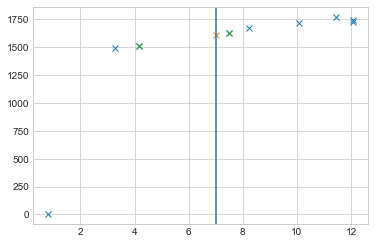

In [493]:
x_lo = split_total_volumes[lo]
x_hi = split_total_volumes[hi]
y_lo = split_point_volumes[lo]
y_hi = split_point_volumes[hi]

#y_new = y_from_ratio(x_hi[-1], x_lo[-1], y_hi[-1,80,80], y_lo[-1,80,80], ratio[-1], target_volumes[-1])


x_dist = (x_hi[-1] - x_lo[-1])**2
x_dist_new = (target_volumes[-1] - x_lo[-1])**2
y_dist = (y_hi[-1] - y_lo[-1])**2
y_new = np.sqrt(ratio[-1]**2 * (y_dist + x_dist) - x_dist_new) + y_lo[-1]
#y_new = np.sqrt((x_dist + y_dist - (x_dist_new * ratio[-1]**2)) / (ratio[-1]**2)) + y_lo[-1,80,80]
#plt.plot(target_volumes[-1], y_new, 'x')
#plt.imshow(split_point_volumes[-1])

y_i = 80
x_i = 40
plt.plot(split_total_volumes, split_point_volumes[:,y_i,x_i], 'x')
plt.plot(target_volumes[-1], y_new[y_i,x_i], 'x')
plt.plot([x_lo[-1], x_hi[-1]],[y_lo[-1, y_i, x_i],y_hi[-1, y_i, x_i]], 'x')
plt.axvline(target_volumes[-1])

In [365]:
x_lo[0],6, x_hi[0]
(6 - x_lo[0])/(x_hi[0] - x_lo[0])

0.5537312462168181

ValueError: operands could not be broadcast together with shapes (1,512,1024) (7,) 

In [392]:
a = np.arange(1,61, dtype=float).reshape((3,4,5)) # Create a 3d array 
a.shape                                           # (3,4,5)

#b = np.array([1.0, 2.0, 3.0, 4.0])                # Create a 1-d array
#b[:, np.newaxis].shape                                           # (4,)

#a / b                                             # Gives a ValueError

#a / b[:, np.newaxis]

(3, 4, 5)

In [406]:
x_lo

array([0.81870705, 0.81870705, 0.81870705, 3.27710371, 4.16731589,
       4.16731589, 4.16731589])

In [407]:
(target_volumes - x_lo).shape

(7,)

(7,)


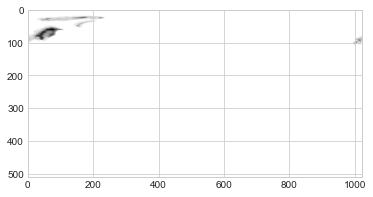

In [414]:
# series specific
x_lo = split_volumes[lo]
x_hi = split_volumes[hi]
y_lo = point_volumes[lo]
y_hi = point_volumes[hi]

#print(y_hi - y_lo)
#print(x_hi - x_lo)
print((x_hi - x_lo).shape)
slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None, None]
#print(slope*target_volumes)
y_new = slope*(target_volumes - x_lo)[:,None, None] + y_lo
#print(y_new)

#point_distance = np.sqrt((x_hi - x_lo)**2 + (y_hi - y_lo)**2)
#new_point_distance = np.sqrt((target_volumes - x_lo)**2 + (y_new - y_lo)**2)
#print(point_distance)
#print(new_point_distance)
#print(lo, hi)
#ratios = new_point_distance / point_distance
plt.imshow(y_new[6])

[0.55373125]


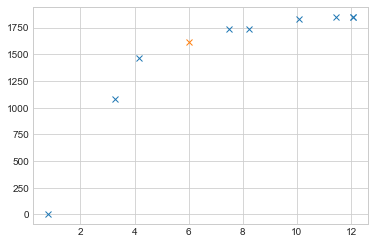

In [351]:
fig, ax = plt.subplots()
#ax.plot(total_volumes,point_volumes[:,80,80], 'x')
x_index = 80
y_index = 60
ax.plot(split_volumes,split_point_volumes[:,y_index,x_index], 'x')
ax.plot(target_volumes, y_new[:,y_index,x_index], 'x')
print(ratios[:,y_index,x_index])
#plt.imshow(y_new[0])

In [358]:
np.sum(functions.volume_to_sle(y_new*area), axis=(1,2))

array([6.])

ValueError: x and y can be no greater than 2-D, but have shapes (1,) and (1, 512, 1024)

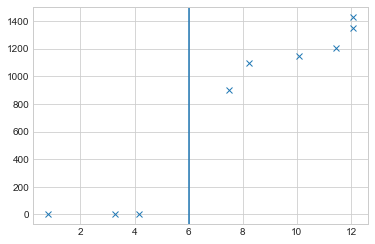

In [357]:
fig, ax = plt.subplots()
ax.plot(total_volumes[:split_index],point_volumes[:split_index,80,80], 'x')
for point in target_volumes:
    ax.axvline(point)


point_volume = point_volumes[:split_index,80,80]

slope = (y_hi - y_lo) / (x_hi - x_lo)#[:, None]
#print((y_hi - y_lo) / (x_hi - x_lo))
y_new = slope*(target_volumes - x_lo)[:, None] + y_lo
#y_new
ax.plot(target_volumes,y_new, 'x')

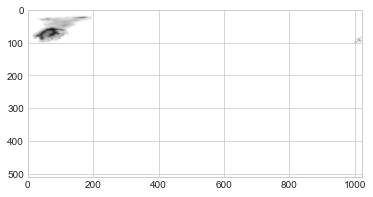

In [160]:
plt.imshow(ds_hughes.thickness[10])

In [159]:
ds_hughes = xr.open_dataset(f"output/lhs/1_lonlat_gl512.nc")
np.sum(functions.volume_to_sle(ds_hughes.thickness*area), axis=(1,2)).values

array([ 0.81870705,  3.27710371,  4.16731589,  7.47701554,  8.21436205,
       10.07663564, 11.46088043, 12.05357617, 12.06258256, 11.59341779,
       10.01936375,  8.85172815,  7.34778606,  5.94984782,  4.70270013,
        4.19847895,  3.44595587,  1.77629233,  0.30794648])

In [157]:
hughes_slice_volumes = np.zeros((100,19))
for i in tqdm(range(100)):
    ds_hughes = xr.open_dataset(f"output/lhs/{i}_lonlat_gl512.nc")
    hughes_slice_volumes[:,i] = np.sum(functions.volume_to_sle(ds_hughes.thickness*area), axis=(1,2))

  0%|          | 0/100 [00:00<?, ?it/s]

ValueError: could not broadcast input array from shape (19,) into shape (100,)

In [102]:
# load data and concat into single series
ds_hughes = xr.open_dataset("output/lhs/0_lonlat_gl512.nc")
ds_batch = xr.open_dataset("output/batchelor/0_lonlat_gl512.nc")
zero_slice = xr.zeros_like(ds_batch)
zero_slice["time"] = [-1]
ds_ice_series = xr.concat([zero_slice, ds_batch, ds_hughes], dim="time")

In [103]:
# calculate grid cell areas and convert to volume
area = functions.calc_grid_area_geo(ds_ice_series.lon.values, np.flip(ds_ice_series.lat.values)+90)
ice_volume = ds_ice_series.thickness*area
ice_total_volume = np.sum(functions.volume_to_sle(ice_volume), axis=(1,2))
ice_total_volume = ice_total_volume.sortby(ice_total_volume)

In [134]:
ice_total_volume

<xarray.DataArray 'thickness' (time: 21)>
array([ 0.        ,  0.33701951,  0.91033505,  2.03579046,  3.73980622,
        3.94338402,  4.77254581,  4.82620205,  5.42561461,  6.93908322,
        8.67352889,  8.83461275,  9.77386845, 10.5499911 , 12.05184461,
       12.09809549, 13.83715428, 14.01735143, 14.60607844, 14.60772266,
       41.91285325])
Coordinates:
    spatial_ref  int64 0
  * time         (time) int64 -1 10000 36500 11000 ... 19000 20000 21000 140000

In [105]:
# sort the series by sle_volume
sorted_ice_volume = ice_volume.sortby(ice_total_volume)

In [107]:
f = interpolate.interp1d(ice_total_volume.values, sorted_ice_volume.values, axis=0, fill_value="extrapolate")

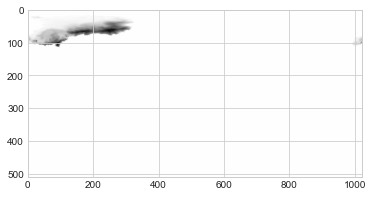

In [136]:
interp_ice = f(80)
plt.imshow(interp_ice)

In [130]:
for value in range(100):
    interp_ice = f(value)
    if np.min(interp_ice) < 0:
        print(f"Below zero at {value}")
        break

Below zero at 58


In [117]:
np.max(ice_total_volume.values)

41.912853252062405